In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
datafile = pd.read_csv(r'..\data_storage\processed\heartProcessed.csv')

In [104]:
datafile.head( )

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age Group,Cholesterol Group
0,40,0,0,140,289,0,0,172,0,0.0,0,0,"(20, 40]","(201.0, 301.5]"
1,49,1,1,160,180,0,0,156,0,1.0,1,1,"(40, 60]","(100.5, 201.0]"
2,37,0,0,130,283,0,1,98,0,0.0,0,0,"(20, 40]","(201.0, 301.5]"
3,48,1,2,138,214,0,0,108,1,1.5,1,1,"(40, 60]","(201.0, 301.5]"
4,54,0,1,150,195,0,0,122,0,0.0,0,0,"(40, 60]","(100.5, 201.0]"


Creating Age groups

In [17]:
age_groups = [0, 20, 40, 60, 80,]
datafile['Age Group'] = pd.cut(datafile['Age'], age_groups)

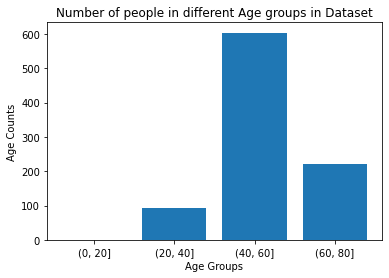

In [73]:
age_group_counts = datafile['Age Group'].value_counts().sort_index()

plt.bar(age_group_counts.index.astype(str), age_group_counts.values)
plt.xlabel("Age Groups")
plt.ylabel("Age Counts")
plt.title("Number of people in different Age groups in Dataset")

plt.show()

From the above graph we can deduce that maximum people in our dataset lie in the range of 40 to 60 years

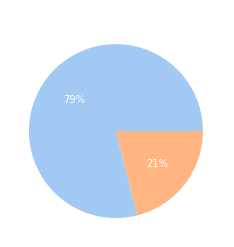

In [71]:
colors = sns.color_palette('pastel')
a = datafile["Sex"].value_counts().to_dict()
a["Male"] = a.pop(0)
a["Female"] = a.pop(1)

#create pie chart
plt.pie(a.values(), labels =a.keys() , colors = colors, autopct='%.0f%%',textprops={'color':"w"})
plt.title("Male Female % in Dataset",color="white")
plt.show()



In [55]:
c_groups = [ 100, 200, 300, 400, 500,600,700 ]
datafile['Cholesterol Group'] = pd.cut(datafile['Cholesterol'], 6 )

In [75]:
df_c = datafile.groupby('Cholesterol Group')['HeartDisease'].sum()
fig = px.line(df_c, x= df_c.index.astype(str) , y=df_c.values )
fig.update_layout(xaxis_title="Cholestrol Range", yaxis_title="Heart Disease",title = "Cholestrol Vs Heart Disease" )
fig.show()

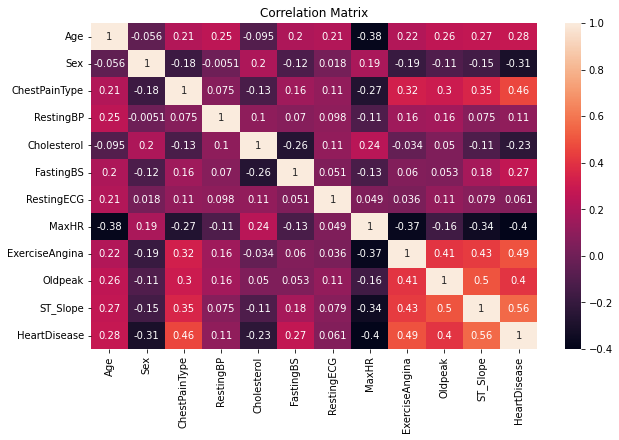

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(datafile.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [97]:
df_cor = datafile.corr()[abs(datafile.corr()["HeartDisease"]) >0.4]["HeartDisease"]
df_cor = df_cor.drop(index = "HeartDisease")
df_cor

ChestPainType     0.459017
MaxHR            -0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope          0.558771
Name: HeartDisease, dtype: float64

In [102]:
fig = px.bar(x=df_cor.index.astype("str"),y = df_cor.values*100 ,color = df_cor.values )
fig.update_layout(xaxis_title="Features", yaxis_title="Correlation %",title = "Top 5 Features Correalted with HeartDisease" )

fig.show()

In [117]:

df_cpt = datafile.groupby('ChestPainType')['HeartDisease'].sum()
df_cpt_count = datafile.groupby('ChestPainType')['HeartDisease'].count()

fig = px.bar(x=df_cpt.index.astype(str) , y=df_cpt.values/df_cpt_count.values*100 , color = df_cpt.values/df_cpt_count.values*100,
                   barmode="group")
fig.update_layout(xaxis_title="ChestPain Type", yaxis_title="Heart Disease % Reported",title = "Relation between Heart Disease and Chest Pain " )

fig.show()

In [122]:
df_cpt = datafile.groupby('ExerciseAngina')['HeartDisease'].sum()
df_cpt_count = datafile.groupby('ExerciseAngina')['HeartDisease'].count()

fig = px.bar(x=df_cpt.index.astype(str) , y=df_cpt.values/df_cpt_count.values*100 , color = df_cpt.values/df_cpt_count.values*100,
                   barmode="group")
fig.update_layout(xaxis_title="ExerciseAngina No : 0 / Yes : 1 ", yaxis_title="Heart Disease % Reported",title = "Relation between Heart Disease and ExerciseAngina " )

fig.show()